<a href="https://colab.research.google.com/github/jgumin/jupyter-notebook/blob/master/bike-sharing-demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. https://github.com/corazzon/KaggleStruggle/blob/master/bike-sharing-demand/bike-sharing-demand-EDA.ipynb
2. https://www.youtube.com/watch?v=Q_MbN-vu_2w
3. https://www.youtube.com/watch?v=95fCw-n5uWM
4. https://www.youtube.com/watch?v=g7EwIFXJntc
5. https://www.youtube.com/watch?v=woSEc5d_skE


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [0]:
pip install plotly==4.1.1

In [0]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline
# %matplotlib nbagg
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = [10, 6]


# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

# #  display two pandas tables side by side
# from IPython.display import display, HTML
# CSS = """
# .output {
#     flex-direction: row;
# }
# """
# HTML('<style>{}</style>'.format(CSS))


# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# allow multiple outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# allow image input
from IPython.display import Image

In [0]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
# %config InlineBackend.figure_format = 'retina'

# !apt -qq -y install fonts-nanum > /dev/null
# import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

Image('https://i.stack.imgur.com/ScJfR.png')


# Library Importing(plotly 4.1.1)

In [2]:
from plotly import __version__
print (__version__)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# Jupyter setup
# init_notebook_mode(connected=True)

import ipywidgets as widgets

4.1.1


In [0]:
import plotly
from plotly import tools

# plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Library Importing(plotly 3.6.1)

In [0]:
from plotly import __version__
print (__version__)
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
import cufflinks as cf

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

# set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

# Jupyter setup
init_notebook_mode(connected=True)

import ipywidgets as widgets

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

# plotly 테마 설정

theming 참고1: https://medium.com/plotly/introducing-plotly-py-theming-b644109ac9c7<br>
theming 참고2: https://nbviewer.jupyter.org/github/jonmmease/plotly.py_release_notebooks/blob/master/notebooks/v3.4.0/templates-gapminder.ipynb <br>
기본theme설정/해제 참고: https://plot.ly/python/templates/#specifying-a-default-themes 

In [0]:
import plotly.io as pio
pio.templates.default = "seaborn" # ['ggplot2', 'seaborn', 'plotly','plotly_white', 'plotly_dark','presentation', 'xgridoff', 'none']

# fig = go.Figure(layout={
#     'title' : 'Figure Title',
#     'font' : {'size': 15, 'family': 'Courier'}
# })

# templated_fig = pio.to_templated(fig)
# pio.templates['large_courier'] = templated_fig.layout.template

# pio.templates.default = 'large_courier'

In [5]:
train = pd.read_csv("/content/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [0]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [0]:
train.head()

In [0]:
fig = make_subplots(rows=3, cols=2)

fig.add_trace(go.Bar(x=train['year'], y=train['count']), row=1, col=1)
fig.add_trace(go.Bar(x=train['month'], y=train['count']), row=1, col=2)
fig.add_trace(go.Bar(x=train['day'], y=train['count']), row=2, col=1)
fig.add_trace(go.Bar(x=train['hour'], y=train['count']), row=2, col=2)
fig.add_trace(go.Bar(x=train['minute'], y=train['count']), row=3, col=1)
fig.add_trace(go.Bar(x=train['second'], y=train['count']), row=3, col=2)

fig.update_traces(marker_color='rgb(158,202,225)')
fig.update_layout(height=1000, showlegend=False)

fig.show()

# make_subplots(rows=1, cols=1, shared_xaxes=False, shared_yaxes=False, start_cell='top-left', print_grid=False, horizontal_spacing=None, vertical_spacing=None, subplot_titles=None, column_widths=None, row_heights=None, specs=None, insets=None, column_titles=None, row_titles=None, x_title=None, y_title=None, **kwargs)

In [0]:
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.1,
                    subplot_titles=["대여량", "계절별 대여량", 
                                    "시간별 대여량", 
                                    "근무일 여부에 따른 대여량"]) 

fig.add_trace(go.Box(y=train['count'], name=""), row=1, col=1)
fig.add_trace(go.Box(x=train['season'],y=train['count']), row=1, col=2)
fig.add_trace(go.Box(x=train['hour'],y=train['count']), row=2, col=1)
fig.add_trace(go.Box(x=train['workingday'],y=train['count']), row=2, col=2)

fig.update_xaxes(domain=[0, 0.3], row=1, col=1)
fig.update_xaxes(domain=[0.5, 1], row=1, col=2)
fig.update_xaxes(domain=[0, 0.6], dtick=1, row=2, col=1)
fig.update_xaxes(domain=[0.7, 1], row=2, col=2)

fig.update_yaxes(tick0=0, dtick=100)

fig.update_layout(height=900, title=dict(text="대여량 현황", x=0.45, y=0.95, xref="paper"),
                  showlegend=False, font=dict(family='Malgun Gothic',size=15, 
                  color='#7f7f7f')
                  )


fig.show()

In [0]:
figure, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel="Count",title="연도별 대여량")
ax2.set(xlabel="month",title="월별 대여량")
ax3.set(xlabel="day",title="일별 대여량")
ax4.set(ylabel="Count",xlabel="hour",title="시별 대여량")
ax5.set(xlabel="minute",title="분별 대여량")
ax6.set(xlabel="second",title="초별 대여량")

In [7]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [0]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

In [8]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


In [0]:
mask[np.tril_indices_from(mask)] = False

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)

sns.regplot(x="temp", y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)

In [0]:
train['datetime']

In [9]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


In [0]:
fig = make_subplots(rows=2, cols=2, vertical_spacing=0.2, 
                    specs=[[{},{}],[{"colspan":2},None]])

fig.add_trace(go.Bar(x=train.groupby('year')['count'].mean().index, 
                     y=train.groupby('year')['count'].mean()), row=1, col=1)
fig.add_trace(go.Bar(x=train.groupby('month')['count'].mean().index, 
                     y=train.groupby('month')['count'].mean()), row=1, col=2)
fig.add_trace(go.Bar(x=train.groupby('year_month')['count'].mean().index, 
                     y=train.groupby('year_month')['count'].mean()), row=2, col=1)

fig.update_xaxes(showgrid=True, ticklen=10, ticks = "outside", 
                 type="category", showticklabels=True)

fig.update_yaxes(title="Count")

fig.update_layout(showlegend=False,
    xaxis1=dict(tickmode='linear', tick0=2011, dtick=1, title="Year"),
    xaxis2=dict(tickmode='linear', tick0=1, dtick=1, title="Month"),
    xaxis3=dict(tickmode='linear', tickangle=30, 
                tickformat="%Y-%m", title="Year-Month"),
)

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)

In [10]:
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"])]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(8001, 20)


((array([-3.75512118, -3.52683847, -3.40136165, ...,  3.40136165,
          3.52683847,  3.75512118]),
  array([3.8918203 , 3.8918203 , 3.8918203 , ..., 6.87626461, 6.87832647,
         6.88550967])),
 (0.6811413933668111, 5.319241302387579, 0.9926479860119485))

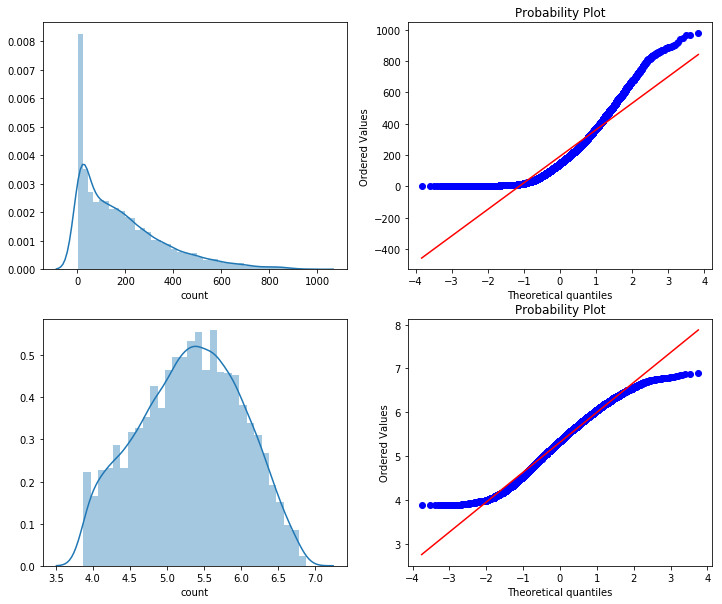

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])